# Evaluating Foundation Models Trained with Earth Observation Data
---
## Overview

A foundation model for Earth observation (EO) data is a large-scale machine learning model pre-trained on vast amounts of remote sensing data from various satellites and sensors, designed to learn general-purpose representations of the Earth's surface and atmospheric phenomena. These models can capture diverse features from a variety of EO datasets, such as optical, radar, thermal, and multispectral sensor imagery, and can be fine-tuned for specific tasks like environmental monitoring, land use classification, climate analysis, and disaster response.

Most current foundation models are developed using a technique called self-supervised learning, in which models learn useful representations by solving tasks that are derived from the structure of the input data itself, without relying on human-annotated labels. These tasks, known as "pretext tasks," are designed to uncover internal patterns or latent features within the data distribution by creating a supervisory signal from the data alone. A common example is masked reconstruction, where parts of the input are intentionally hidden or removed, and the model is trained to predict or reconstruct the missing content based on the visible portions. This encourages the model to understand the underlying structure and context of the data. Other approaches to self-supervision include contrastive learning, where the model learns to distinguish between similar and dissimilar pairs of data, and generative methods, which learn to synthesize or model entire input distributions. Unlike traditional supervised learning, which relies on labeled datasets, self-supervised learning does not require labeled examples ([Chen et al., 2020](https://proceedings.mlr.press/v119/chen20j.html)). Self-supervised learning can be applied in many types of modeling tasks, to include computer vision, and is gaining traction because it allows models to leverage vast amounts of unlabeled data whilst showing to be effective in improving performance across various domains.  

<img src="https://www.mdpi.com/remotesensing/remotesensing-14-04824/article_deploy/html/images/remotesensing-14-04824-g001.png" height="300" />


["A General Self-Supervised Framework for Remote Sensing Image Classification" by Gao et al., 2022.](https://www.mdpi.com/2072-4292/14/19/4824)

Vision Transformers (ViTs) are a class of deep learning architectures that apply the transformer framework—originally developed for natural language processing—to visual data. By dividing images into fixed-size patches and treating them as a sequence of tokens, ViTs model patterns and relationships in the data using self-attention mechanisms. While ViTs are commonly used as the architectural backbone in many vision foundation models, they are not foundation models by themselves. Rather, ViTs serve as one of the key building blocks in constructing such models. ViTs require large datasets because transformers do not have the built-in inductive biases (like translation invariance) that convolutional neural networks (CNNs) have ([Dosovitskiy et al., 2021](https://arxiv.org/abs/2010.11929)). The data provided to train these models must be crafted with thoughtful sampling and stratification to ensure the correct representations are learned, and biases or artifacts reduced. Once that is ensured, it is worth considering that the effectiveness of these models greatly improves with larger datasets by provisioning more examples and greater diversity, thereby allowing the model to learn robust representations that generalize well across different tasks. More data improves the learning signal and helps the model differentiate between subtle visual cues (Chen et al., 2020).

<img src="https://media.springernature.com/lw1200/springer-static/image/art%3A10.1038%2Fs41598-024-67186-4/MediaObjects/41598_2024_67186_Fig2_HTML.png" height="300" />

["Transformer-based land use and land cover classification with explainability using satellite imagery" by Khan et al., 2024](https://www.nature.com/articles/s41598-024-67186-4)

A foundation model’s extensive training regime enables its applicability across various downstream tasks. To achieve a properly trained FM, exposure to diverse and extensive data is needed in order to capture the variability and complexity inherent in real-world settings. For vision-specific foundation models, this means learning representations that can differentiate between millions of different phenomena, scenes, textures, lighting conditions, and other visual phenomena (Dosovitskiy et al., 2021). Large datasets help foundation models handle data bias and distribution shifts. For remote sensing vision tasks, biases can come from the sensor type, camera angle, geographic location, weather and lighting conditions under which images were captured ([Radford et al., 2021](https://arxiv.org/abs/2103.00020)). Training on diverse datasets that encompass multiple contexts and environments helps the model learn robust representations that generalize well across different conditions. Furthermore, training large models with millions (or billions) of parameters requires substantial data to avoid overfitting. When training vision-specific models, such as those using Vision Transformers (ViTs) as the underlying architecture or applying a self-supervised learning paradigm, having large datasets ensures that the model does not merely memorize the training data but learns generalized features that are useful across tasks (Dosovitskiy et al., 2021). Yet, while large datasets can support the learning of generalized features rather than memorization, increasing dataset size alone does not guarantee generalization—especially as models grow in parameter count. Since larger models also have a higher capacity to memorize training data, which can lead to overfitting, the task of properly sampling and splitting the data is crucial. Ensuring meaningful generalization requires careful dataset sampling and experimental design. Researchers must ensure that evaluation data (e.g., test sets) contain spatial and/or temporal slices not seen during training to mitigate data leakage and provide more robust evidence that performance stems from generalization, not memorization.


As stated, many vision foundation models rely on self-supervised learning, where they generate their own supervision signals from the data itself by solving pretext tasks—such as predicting masked patches in an image or distinguishing between augmented views. While large datasets offer the diversity needed to expose models to a broad range of visual patterns and contexts, dataset size alone is not sufficient. The quality, representativeness, and sampling strategy of the data are equally critical. Poorly sampled or imbalanced data can bias the model or lead to overfitting, especially in self-supervised setups where the supervision signal comes entirely from the data distribution. Careful attention must be paid to spatial and temporal coverage, stratification across relevant factors (e.g., class distributions, lighting conditions, sensor types), and avoidance of data leakage. High-quality, well-curated datasets not only enhance learning but also ensure that the representations learned are robust, transferable, and capable of capturing fine-grained details like textures, colors, and shapes across diverse conditions.

---

### How foundation models improve efficiency in machine learning workflows

Foundation models improve efficiency in machine learning workflows by enabling tasks such as zero-shot inference, transfer learning, and general-purpose feature extraction with minimal task-specific data or training. These theoretical benefits have been demonstrated in practical applications across domains. For example, [Prithvi (Prithvi-EO-1.0 and 2.0)](https://huggingface.co/collections/ibm-nasa-geospatial/prithvi-for-earth-observation-6740a7a81883466bf41d93d6) has shown state-of-the-art performance in flood detection and above ground biomass estimation with limited labeled data ([Jakubik et al., 2023](https://arxiv.org/abs/2310.18660) and [Szwarcman et al., 2025](https://arxiv.org/abs/2412.02732)). [CLAY](https://clay-foundation.github.io/model/index.html) has demonstrated robust zero-shot generalization across different geographies and resolutions. For example, it enabled zero shot detection of deforestation events in [Schroer et al., 2025](https://aws.amazon.com/blogs/machine-learning/revolutionizing-earth-observation-with-geospatial-foundation-models-on-aws/). These efficiencies translate to significant reductions in labeling costs and compute resources, especially in data-scarce or resource-constrained settings.

#### **1. Reduced training costs**
Traditional models often require training from scratch for every application, demanding significant computational resources and labeled datasets, which is especially challenging in earth observation contexts. Foundation models are pre-trained on massive datasets and can be fine-tuned for specific tasks using smaller labeled datasets, drastically reducing the costs of data annotation and training. Since these models undergo extensive pre-training on diverse datasets, they allow for the advantage of transfer learning to enable high performance with limited fine-tuning using smaller, domain-specific datasets. Suffice to say, foundation models reduce barriers to entry for users with limited resources.

**Example:** Instead of creating a wholly new model for deforestation detection, a pre-trained foundation model can be adapted in a fraction of the time and cost.

#### **2. Faster development**
Foundation models accelerate the development cycle by providing ready-to-use features or embeddings. This eliminates the need for extensive preprocessing and training, allowing users to focus on fine-tuning or directly deploying the model.

**Example:** A user working with PCA analysis on hurricane impacts can use pre-trained embeddings from a foundation model, reducing the need to engineer complex features.

#### **3. Improved accuracy with limited data**
Foundation models benefit from their extensive pre-training, making them robust and effective even when fine-tuned with limited domain-specific data. This reduces the need for expensive and time-consuming field campaigns or data collection.

**Example:** Foundation models trained with weather data may have a baseline understanding of confounding weather variation that would otherwise have to be learned from the extensive collection and labeling of target features under different weather conditions.

#### **4. Scalability across applications**
A single foundation model can be repurposed for various tasks, avoiding the cost of building separate models for each application.

**Example:** A foundation model trained on global land cover data can be applied to soil health assessment, mangrove monitoring, or coral reef health analysis.

#### **5. Democratizing access**
With pre-trained foundation models available as open-source or through APIs, smaller organizations and researchers gain access to high-quality tools without investing in expensive infrastructure.

#### **6. Good backbones (better than ImageNet or RGB-trained models)**
Foundation models for EO are trained on specialized geospatial datasets (e.g. multi-spectral or radar satellite imagery), making their feature representations more aligned with EO tasks compared to models pre-trained on ImageNet or similar RGB datasets. EO data often includes multi-spectral bands (e.g., near-infrared) or radar data, which contain richer and more complex information than standard RGB images.
- **Example:** A foundation model trained on multi-spectral imagery will perform better for tasks like vegetation health assessment than an RGB-trained ImageNet model.

#### **7. Not as good as bespoke models, but get 90% there with 10% of the work**
While foundation models may not achieve the same level of accuracy as task-specific bespoke models, they deliver competitive results with a fraction of the effort. Bespoke models demand extensive tuning, custom architectures, and domain expertise, which are costly and time-intensive. Foundation models offer a practical compromise.
- **Example:** For deforestation detection, a bespoke model might achieve 95% accuracy, while a foundation model could achieve 90% accuracy with significantly less effort.

---

### Limitations
All this said, foundation models are still a relatively new development in EO and have yet to see widespread validation across diverse real-world applications. Thus, while promising, their adoption is still in its early stages. Challenges like model bias, scalability, and performance in extreme conditions require further study.
- **Example:** A foundation model trained on global land cover data might need more validation to ensure reliability in highly localized or unique environments.

---

### Challenges
There are multiple aspects of Earth Observation Foundation Models (EOFM) that are unique to the broader scope of foundation models research. Earth observation imagery is very diverse in how it is captured. The instruments capture various frequencies at different wavelength and band widths, the ground sampling distance of the captured imagery ranges from a few centimeters to hundreds of meters, and the same location is often captured at multiple points in time. These substantial differences in the spectral, spatial, and temporal resolution make it harder for models to learn generalized patterns. In addition, earth observation data also has unique metadata characteristics that can be deterministic for the quality and the potential content of a dataset. Examples are the coordinate reference system used, the latitude and longitude location of the captured image, view angles that may be different from image to image, and data provenance artifacts such as how the data is stored and served across various providers.

Foundation models in EO would ideally capture and learn from as many of the key dimensions and metadata items as possible. An ideal model would be trained on a wide range of variation in these parameters (spatial, spectral, temporal resolutions, as well as geography, for example) during the learning process, via methods like global sampling over multiple years and seasons, as well as for a wide range of different sensors at different resolutions. Similarly, models would ideally accept a wide range of formats and image sizes during inference.

While no single model to date fully integrates all relevant dimensions of remote sensing complexity—such as temporal dynamics, multi-sensor fusion, and variable spatial and spectral resolutions—there are promising efforts in each area: for instance, Prithvi and [Presto](https://arxiv.org/abs/2304.14065) explore temporal modeling, [DOFA](https://github.com/zhu-xlab/DOFA) addresses multi-sensor fusion, and Clay supports variable image resolutions and types. However, the goal need not be a single, monolithic model that captures all aspects simultaneously. In practice, combining multiple specialized models in modular or hierarchical architectures can offer a more scalable and adaptable approach. These modular systems can collaboratively represent the rich diversity of the remote sensing domain, allowing for flexible subsetting, expansion, and fine-tuning across tasks. It’s important to think creatively about architecture design, embracing hybrid strategies that align with the diverse and evolving nature of geospatial data.

---

#### Using and evaluating EOFM

In the next portion, we will work through interactive demonstrations of how to use and evaluate EOFM for real domain-specific downstream tasks. Specifically, we will leverage two different EOFMs to generate embeddings for imagery before and after a natural hazard, and determine if these embeddings capture a descriptive pattern. We will also use these EOFMs in a fine tuning capacity to detect the natural hazard. After fine tuning, we'll calculate the performance scores. At the end, you will have worked through two different methods of leveraging EOFM using two different EOFM base models.

The two models we will work with include:
- Prithvi
- Clay

To begin evaluating the EOFMs, we will start with the Privthi model.

The [Prithvi HLS foundation model](https://github.com/NASA-IMPACT/Prithvi-EO-2.0) is an EOFM developed collaboratively by IBM and NASA. It leverages a **Vision Transformer (ViT)** architecture and is pre-trained on the [Harmonized Landsat-Sentinel-2 (HLS)](https://hls.gsfc.nasa.gov/) dataset. The model incorporates a **Masked Autoencoder (MAE)** self-supervised learning approach with a Mean Squared Error (MSE) loss function. Its design is optimized for spatiotemporal analysis, using 3D patch embeddings to encode spatial and temporal features from input data formatted as a sequence of geospatial "videos" (`B, C, T, H, W` — bands, channels, time, height, width). 

The architecture leverages temporal embeddings to model time-series dynamics and spatial embeddings to capture geospatial structure. Spectral inputs to Prithvi include six key spectral bands—Blue, Green, Red, Narrow NIR, SWIR1, and SWIR2—provided as geotiff files in reflectance units. However, it is important to recognize that the use of HLS reflectance data introduces inherent distributional differences compared to native Landsat or Sentinel-2 sources. These discrepancies can stem not only from sensor harmonization techniques but also from inconsistencies across data-serving platforms (e.g., Copernicus Hub vs. Earthdata Search), which have been shown to yield different pixel-level statistics for nominally identical products. Such shifts in input distributions can lead to performance degradation—especially when using frozen encoder weights—and should be carefully considered during training, evaluation, and fine-tuning. Ensuring that model assumptions align with the data provenance is critical for maintaining generalizability and transferability across operational contexts.

<img src="https://huggingface.co/ibm-nasa-geospatial/Prithvi-EO-1.0-100M/resolve/main/GFM.png" height="300" />

It has been fine-tuned for applications such as flood mapping, burn scar detection, and land cover classification. The pre-trained weights and fine-tuning workflows are openly available on platforms like Hugging Face, promoting accessibility and further development by the research community.

## Run Prithvi
This exercise involves carrying out a complete analysis from beginning to end. The steps include:
1. Selecting a location and time range of interest.
2. Downloading [Harmonized Landsat and Sentinel-2 (HLS)](https://hls.gsfc.nasa.gov/) imagery for the specified parameters (make sure you have an [Earth Data login](https://urs.earthdata.nasa.gov/) and [.netrc file](https://urs.earthdata.nasa.gov/documentation/for_users/data_access/create_net_rc_file) for this).
3. Loading the model checkpoint.
4. Formatting the data to match the model's requirements.
5. Running the model on the prepared imagery.
6. Performing PCA to analyze the model's output (embeddings).
7. Fine-tuning a classifier on top of the model's embeddings.

In [1]:
import earthaccess


In [ ]:
earthaccess.login(persist=True)


In [3]:
import os
import urllib

import geopandas as gpd
import math
import numpy as np
import pandas as pd
import pystac_client
import rioxarray
import stackstac
import torch
import yaml

from box import Box
from einops import rearrange, reduce
from huggingface_hub import hf_hub_download
from matplotlib import pyplot as plt
from rasterio.enums import Resampling
from shapely import Point
from sklearn import decomposition, svm
from sklearn.metrics import pairwise_distances
from sklearn.naive_bayes import MultinomialNB
from torchvision.transforms import v2
from terratorch import BACKBONE_REGISTRY

In [4]:
os.environ["GDAL_HTTP_COOKIEFILE"] = os.path.expanduser("~/.urs_cookies")
os.environ["GDAL_HTTP_COOKIEJAR"] = os.path.expanduser("~/.urs_cookies")
os.environ["GDAL_HTTP_NETRC"] = "YES"


### Define Location and Date of Interest
For this example, we analyze a region in Pakistan that experienced a monsoon flood. We will generate embeddings for the area with the model and analyze any relationships within those.

In [5]:
# Point over Padidan, Pakistan
lat, lon = 26.776567, 68.287374

# Dates surrounding a major monsoon flood (August 20, 2022)
start = "2022-06-01"
end = "2022-10-30"

### Retrieve Data from the STAC Catalog
Using the specified location and dates, let's obtain [Harmonized Landsat and Sentinel-2 (HLS)](https://hls.gsfc.nasa.gov/) imagery with `stackstac`. We'll parameterize our search query so as to only retrieve the desired STAC items for analysis.

In [6]:
STAC_API = "https://cmr.earthdata.nasa.gov/stac/LPCLOUD"
COLLECTION = "HLSS30.v2.0"

# Search the catalogue
catalog = pystac_client.Client.open(STAC_API)
search = catalog.search(
    collections=[COLLECTION],
    datetime=f"{start}/{end}",
    bbox=(lon - 1e-5, lat - 1e-5, lon + 1e-5, lat + 1e-5),
    max_items=100,
    query={"eo:cloud_cover": {"lt": 50}},
)

all_items =  search.item_collection()
all_items
item = all_items[0]
item

# Use S3 links for downloading imagery
for item in all_items:
    for key in item.assets.keys():
        if "alternate" in item.assets[key].extra_fields:
            url = urllib.parse.urlparse(
                item.assets[key].extra_fields["alternate"]["s3"]["href"]
            )
            item.assets[key].href = f"https://{url.netloc}.s3.amazonaws.com{url.path}"
            item.assets[key].href = item.assets[key].extra_fields["alternate"]["s3"][
                "href"
            ]

# Reduce to LS8 and LS9
items = []
dates = []
for item in all_items:
    items.append(item)
    dates.append(item.datetime.date())


print(f"Found {len(items)} items")

Found 22 items


### Create a Bounding Box for the Area of Interest
We'll generate this bounding box in the projection of the dataset to ensure appropriately sized image chips.


In [7]:
# Extract coordinate system
epsg = 32629 #items[0].properties["proj:epsg"]

# Convert point of interest into the image projection
# (assumes all images are in the same projection)
poidf = gpd.GeoDataFrame(
    pd.DataFrame(),
    crs="EPSG:4326",
    geometry=[Point(lon, lat)],
).to_crs(epsg)

coords = poidf.iloc[0].geometry.coords[0]

# Create bounds in projection
size = 224
gsd = 30
bounds = (
    coords[0] - (size * gsd) // 2,
    coords[1] - (size * gsd) // 2,
    coords[0] + (size * gsd) // 2,
    coords[1] + (size * gsd) // 2,
)

### Retrieve the imagery data

In [8]:
# Retrieve the pixel values, for the bounding box in
# the target projection. In this example we use only
# the RGB and NIR bands.
stack = stackstac.stack(
    items,
    bounds=bounds,
    snap_bounds=False,
    epsg=epsg,
    resolution=gsd,
    dtype="float64",
    rescale=False,
    fill_value=0,
    assets=["B02", "B03", "B04", "B05", "B06", "B07"],
    resampling=Resampling.nearest,
)

print(f"Working with stack of size {stack.shape}")

stack = stack.compute()

stack

Working with stack of size (22, 6, 224, 224)


<xarray.DataArray 'stackstac-da1e748acd0d3e5a455abcb7d5d967b9' (time: 22,
                                                                band: 6,
                                                                y: 224, x: 224)> Size: 53MB
array([[[[1065., 1212., 1167., ..., 1263., 1263., 1263.],
         [1212., 1212., 1212., ..., 1313., 1263., 1098.],
         [1314., 1212., 1316., ..., 1313., 1313., 1178.],
         ...,
         [ 980.,  980.,  976., ...,  964., 1006., 1006.],
         [ 980.,  976.,  976., ..., 1160., 1186., 1006.],
         [ 895.,  827.,  976., ..., 1186., 1186., 1170.]],

        [[1583., 1785., 1679., ..., 1831., 1831., 1831.],
         [1785., 1785., 1785., ..., 1887., 1831., 1605.],
         [1904., 1785., 1902., ..., 1887., 1887., 1703.],
         ...,
         [1464., 1464., 1441., ..., 1491., 1543., 1543.],
         [1464., 1441., 1441., ..., 1710., 1735., 1543.],
         [1452., 1382., 1441., ..., 1735., 1735., 1717.]],

        [[1812., 2196., 1961., ..., 2120., 2120., 2120.],
         [2196., 2196., 2196., ..., 2194., 2120., 1896.],
         [2311., 2196., 2377., ..., 2194., 2194., 2019.],
         ...,
...
         [1555., 1555., 1489., ..., 1878., 1927., 1927.],
         [1555., 1489., 1489., ..., 1845., 1859., 1927.],
         [1846., 1754., 1489., ..., 1859., 1859., 1844.]],

        [[1756., 1649., 1363., ..., 2087., 2087., 2087.],
         [1649., 1649., 1649., ..., 2128., 2087., 1934.],
         [1509., 1649., 1629., ..., 2128., 2128., 1864.],
         ...,
         [1909., 1909., 1739., ..., 2074., 2118., 2118.],
         [1909., 1739., 1739., ..., 1966., 2002., 2118.],
         [2098., 1975., 1739., ..., 2002., 2002., 1979.]],

        [[2047., 1888., 1583., ..., 2214., 2214., 2214.],
         [1888., 1888., 1888., ..., 2264., 2214., 2121.],
         [1724., 1888., 1859., ..., 2264., 2264., 2013.],
         ...,
         [2074., 2074., 1868., ..., 2256., 2301., 2301.],
         [2074., 1868., 1868., ..., 2118., 2127., 2301.],
         [2285., 2147., 1868., ..., 2127., 2127., 2102.]]]],
      shape=(22, 6, 224, 224))
Coordinates:
  * time            (time) datetime64[ns] 176B 2022-06-02T06:11:57.759000 ......
    id              (time) <U34 3kB 'HLS.S30.T42RVQ.2022153T055641.v2.0' ... ...
  * band            (band) <U3 72B 'B02' 'B03' 'B04' 'B05' 'B06' 'B07'
  * x               (x) float64 2kB 9.01e+06 9.01e+06 ... 9.016e+06 9.016e+06
  * y               (y) float64 2kB 7.397e+06 7.397e+06 ... 7.39e+06 7.39e+06
    start_datetime  (time) <U24 2kB '2022-06-02T06:11:57.759Z' ... '2022-10-3...
    eo:cloud_cover  (time) int64 176B 0 0 21 0 0 0 20 43 36 ... 0 0 0 0 0 1 0 0
    end_datetime    (time) <U24 2kB '2022-06-02T06:11:57.759Z' ... '2022-10-3...
    epsg            int64 8B 32629
Attributes:
    spec:        RasterSpec(epsg=32629, bounds=(9009751.094370605, 7389835.91...
    crs:         epsg:32629
    transform:   | 30.00, 0.00, 9009751.09|\n| 0.00,-30.00, 7396555.92|\n| 0....
    resolution:  30

### Review the Downloaded Imagery
The imagery dataset contains eight pre-flood images (one of which is cloudy) and 14 post-flood images.

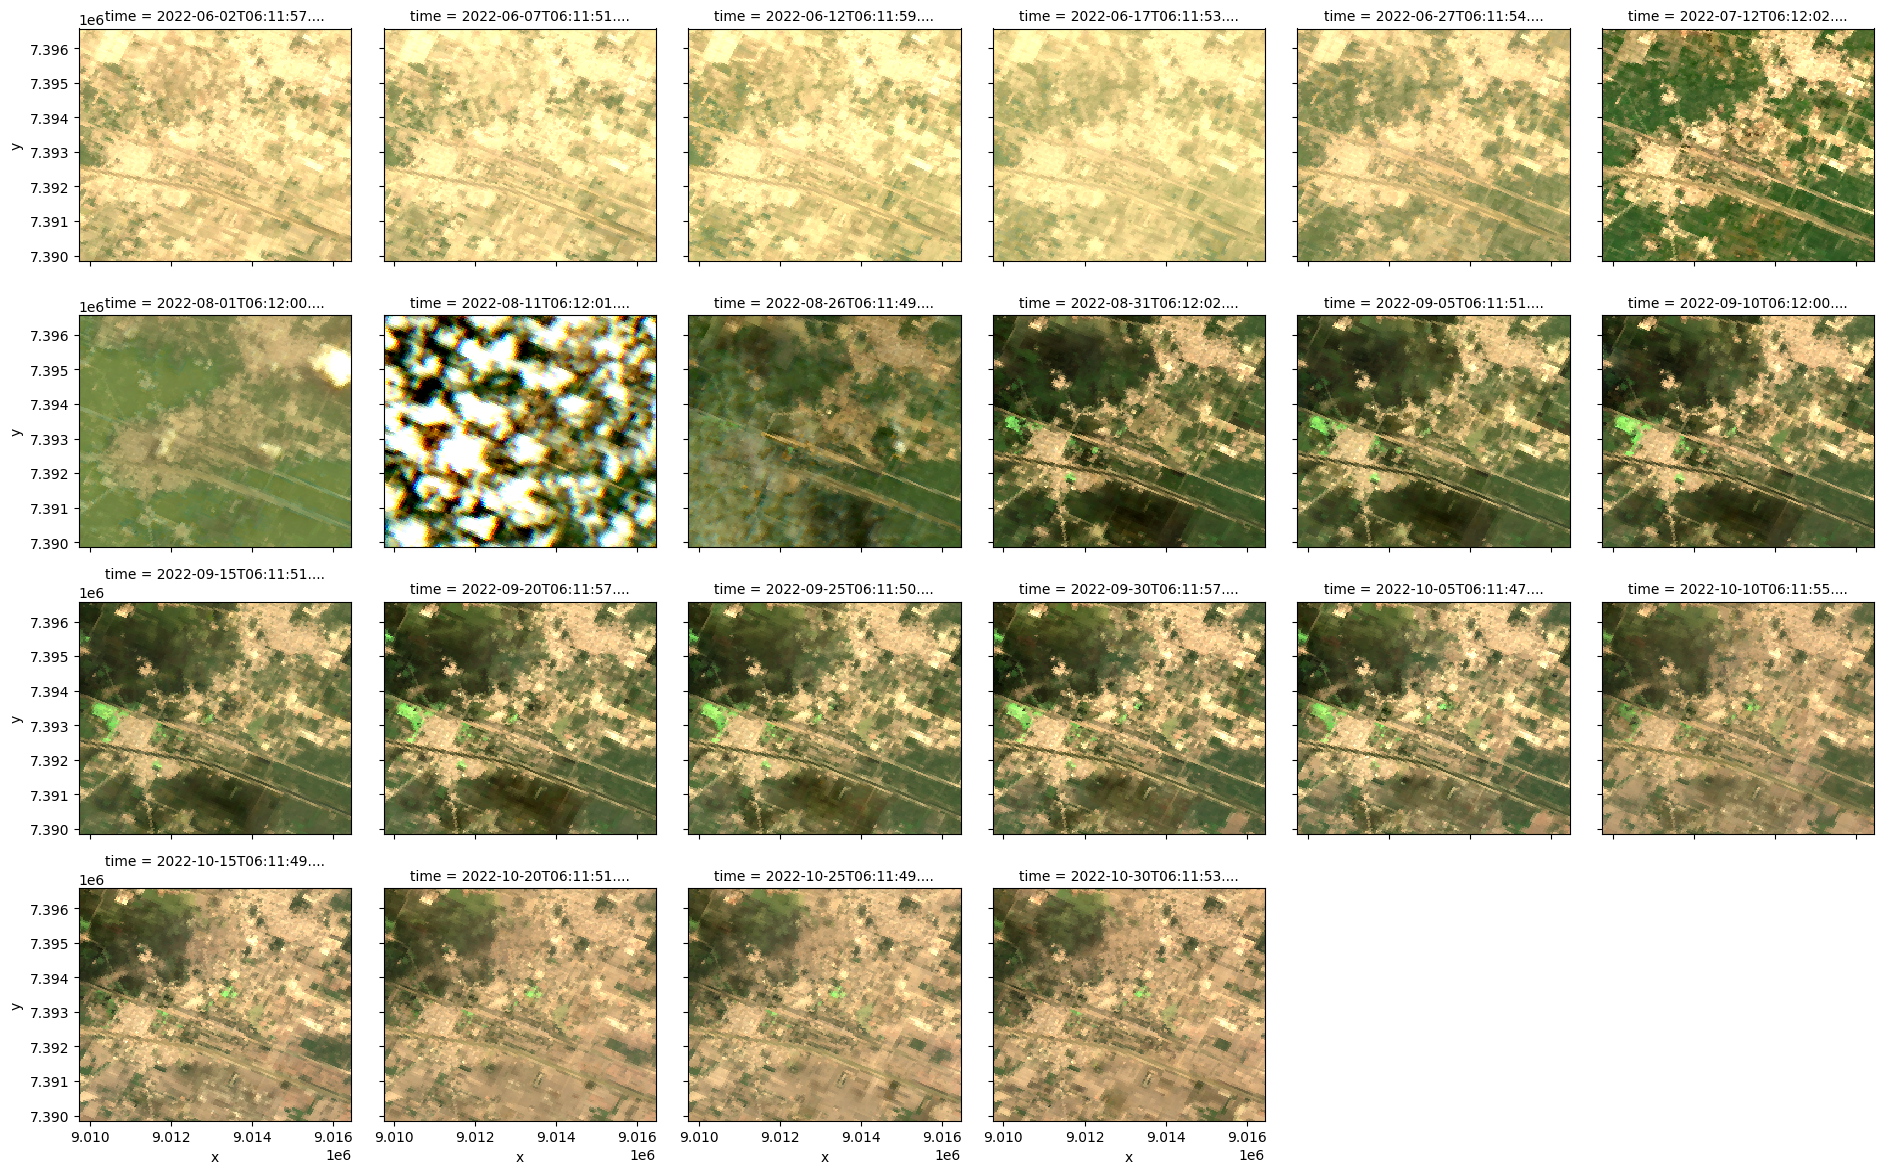

In [9]:
stack.sel(band=["B04", "B03", "B02"]).plot.imshow(
    row="time", rgb="band", vmin=0, vmax=2000, col_wrap=6
)

In [10]:
stack.shape

(22, 6, 224, 224)

### Load the Model
Now that we have the imagery prepared, the next step is to load the model for analysis.

In [11]:
from terratorch import BACKBONE_REGISTRY

# Find and print available Prithvi models in the model registry
print([model_name for model_name in BACKBONE_REGISTRY if "terratorch_prithvi" in model_name])

# Check that the model we want to use is in the registry
"terratorch_prithvi_eo_v2_300" in BACKBONE_REGISTRY

# instantiate our desired model
# NOTE: the backbone registry prefix (e.g., `terratorch`) is optional
model = BACKBONE_REGISTRY.build("prithvi_eo_v2_300", pretrained=True)

['terratorch_prithvi_eo_tiny', 'terratorch_prithvi_eo_v1_100', 'terratorch_prithvi_eo_v2_300', 'terratorch_prithvi_eo_v2_600', 'terratorch_prithvi_eo_v2_300_tl', 'terratorch_prithvi_eo_v2_600_tl']


### Format Band Pixel Data for the Model
Now we will transform the imagery stack into the format required by the model.
Prithvi uses short time series of three images, "triples," as input. Due to limited data, overlapping dates are used to create 19 triples: the first spans dates 1 to 3, the second covers dates 2 to 4, and so forth.

In [12]:
input_size = [1,224,224]
patch_size = [1,16,16]

In [13]:
chips = []
for i in range(19):
    chips.append(stack.isel(time=slice(i, i + 3)).values)
chips[0].shape

(3, 6, 224, 224)

In [14]:
len(chips)

19

### Execute the Model
Now we pass the prepared datacube to the model to generate one embedding vector for each image.

In [15]:
embeddings = []

for ts in chips:
    ts = rearrange(ts, "t c h w -> 1 c t h w")
    ts = ts.astype(np.float32)
    if ts.shape[2] == 3:
        embedding = model.forward(torch.from_numpy(ts))
        cls_embedding = embedding[0][:, 0, :].detach().cpu().numpy().ravel()
        embeddings.append(cls_embedding)

embeddings = np.array(embeddings)

In [16]:
len(embeddings)

19

### Analyze the Embeddings
Now we will run a simple analysis to find any patterns in the model's understanding of the data. PCA is applied to reduce each embedding to a single value. The embeddings, as you'll see, appear to be grouped into three categories within PCA space: pre-flood images, cloudy images, and post-flood images.


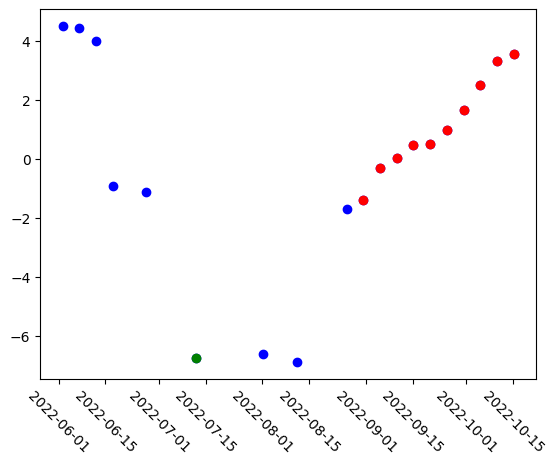

In [17]:
# Run PCA
pca = decomposition.PCA(n_components=1)
pca_result = pca.fit_transform(embeddings)

plt.xticks(rotation=-45)

# Plot all points in blue first
plt.scatter(stack.time[:19], pca_result, color="blue")

# # Re-plot cloudy images in green
plt.scatter(stack.time[5], pca_result[5], color="green")

# Color all images after flood in red
plt.scatter(stack.time[9:19], pca_result[9:19], color="red")

### Embeddings for Each Time Step
The model also generates embeddings for individual time steps. These embeddings are extracted for each input triple and visualized using PCA, revealing similar clustering patterns.

In [18]:
long_embeddings = []

for ts in chips:
    ts = rearrange(ts, "t c h w -> 1 c t h w")
    ts = ts.astype(np.float32)
    if ts.shape[2] == 3:
        embedding = model.forward(torch.from_numpy(ts))
        cls_embedding = embedding[0][:, 0, :].detach().cpu().numpy().ravel()
        embedding = rearrange(embedding[0][:, 1:, :], "1 (t n) d -> 1 t n d", t=3)[0]
        embedding = reduce(embedding, "t n d -> t d", "mean").detach().numpy()
        t0, t1, t2 = embedding
        long_embeddings.extend([t0] + [t1] + [t2])

In [19]:
len(long_embeddings)

57

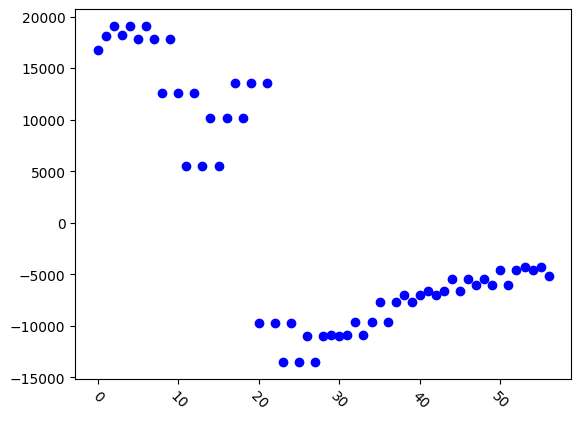

In [20]:
# Run PCA
pca = decomposition.PCA(n_components=1)
pca_result = pca.fit_transform(long_embeddings)

plt.xticks(rotation=-45)

# Plot all points in blue first
plt.scatter(np.arange(57), pca_result, color="blue")

### Fine-Tune the Model
Now we will train a classifier head for detecting flood events on top of the embeddings.

In [21]:
# Label the images we downloaded
# 0 = Cloud
# 1 = Pre-flood
# 2 = Post-flood
labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
# Split into fit and test manually, ensuring we have at least all 3 classes in both sets
fit = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
test = [1, 3, 5, 7, 9, 11, 13, 15, 17]

# Train a support vector machine model
clf = svm.SVC()
clf.fit(embeddings[fit], labels[fit])

# Predict classes on test set
prediction = clf.predict(embeddings[test])

# Perfect match for SVM
match = np.sum(labels[test] == prediction)
print(f"Matched {match} out of {len(test)} correctly")

Matched 5 out of 9 correctly


## Clay

The Clay Foundation model is another open source EOFM. It also utilizes a **Vision Transformer (ViT)** architecture with a **masked autoencoder** approach. The encoder of the model consists of several layers, each with multiple attention heads, allowing it to capture complex spatial and temporal relationships in the data. The self-attention mechanism enables it to understand both local and global features within satellite imagery. The decoder is structured similarly but with fewer layers and attention heads, and it is optimized for efficient reconstruction during the pre-training phase. The architecture uses an MLP (Multi-Layer Perceptron) layer for feature extraction. 

The model is trained on a large dataset that combines multi-modal geospatial data from Landsat 8 and 9, Sentinel-2 L2A, Sentinel-1 RTC, NAIP and LINZ. A sampling strategy carefully curated to cover a variety of land types was implemented, ensuring diverse geographical and seasonal representation. 

The architecture and data inputs make Clay highly flexible. 

For more details, you can visit the official [Clay Foundation website](https://madewithclay.org) or the [documentation website](https://clay-foundation.github.io/model/index.html).

Let's get the necessary code for Clay.

In [ ]:
!mkdir clay

In [ ]:
cd clay

In [ ]:
!git clone --depth=1 https://github.com/Clay-foundation/model

Cloning into 'model'...
remote: Enumerating objects: 2300, done.
remote: Counting objects: 100% (537/537), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 2300 (delta 405), reused 327 (delta 324), pack-reused 1763 (from 2)
Receiving objects: 100% (2300/2300), 210.04 MiB | 19.46 MiB/s, done.
Resolving deltas: 100% (1356/1356), done.


In [23]:
ls model

cluster/            docs/               README.md           trainer.py
CODE_OF_CONDUCT.md  environment.yml     ruff.toml           utils/
configs/            finetune/           src/
copy_data.sh        LICENSE             train_clay.sh


In [25]:
import sys
sys.path.append("./model/")
from src.module import ClayMAEModule


### Load the model

We now have the data to analyse, let's load the model. But first, we need to rename the bands to match what's expected in the config file.

In [26]:
stack.band.values

array(['B02', 'B03', 'B04', 'B05', 'B06', 'B07'], dtype='<U3')

In [27]:
if "band" in stack.coords:
    stack = stack.assign_coords(band=["red" if b == "B04" else b for b in stack.band.values])
    stack = stack.assign_coords(band=["green" if b == "B03" else b for b in stack.band.values])
    stack = stack.assign_coords(band=["blue" if b == "B02" else b for b in stack.band.values])
    stack = stack.assign_coords(band=["nir" if b == "B05" else b for b in stack.band.values])
    stack = stack.assign_coords(band=["swir16" if b == "B06" else b for b in stack.band.values])
    stack = stack.assign_coords(band=["swir22" if b == "B07" else b for b in stack.band.values])

In [28]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
ckpt = "https://huggingface.co/made-with-clay/Clay/resolve/main/v1.5/clay-v1.5.ckpt"
torch.set_default_device(device)

model = ClayMAEModule.load_from_checkpoint(
    ckpt,
    model_size="large",
    metadata_path="./model/configs/metadata.yaml",
    dolls=[16, 32, 64, 128, 256, 768, 1024],
    doll_weights=[1, 1, 1, 1, 1, 1, 1],
    mask_ratio=0.0,
    shuffle=False,
)
model.eval()

model = model.to(device)

### Prepare Band Metadata for Model Input  
This step is the most technical so far. It involves processing the imagery stack and converting its data into the format required by the model. This includes normalizing the latitude/longitude and the imagery's date values.  

The Clay model is designed to accept any combination of bands in any order, even from different platforms. However, the model requires metadata about each band, including its central wavelength and normalization parameters. This information allows the model to standardize the data and correctly interpret each band based on its wavelength.  

For Sentinel-2, we can extract these details from the model's metadata file. For other platforms, a custom approach may be needed to provide this information. For simplicity here, we utilize the Sentinel-2 parameters for our HLS imagery.

In [29]:
# Extract mean, std, and wavelengths from metadata
platform = "sentinel-2-l2a"
metadata = Box(yaml.safe_load(open("model/configs/metadata.yaml")))
mean = []
std = []
waves = []
# Use the band names to get the correct values in the correct order.
for band in stack.band:
    mean.append(metadata[platform].bands.mean[str(band.values)])
    std.append(metadata[platform].bands.std[str(band.values)])
    waves.append(metadata[platform].bands.wavelength[str(band.values)])

# Prepare the normalization transform function using the mean and std values.
transform = v2.Compose(
    [
        v2.Normalize(mean=mean, std=std),
    ]
)


### Convert Band Pixel Data to Model Format 
This step involves transforming the imagery stack into the format required by the model. It includes normalizing the latitude/longitude and the imagery's date values.

In [30]:
# Prep datetimes embedding using a normalization function from the model code.
def normalize_timestamp(date):
    week = date.isocalendar().week * 2 * np.pi / 52
    hour = date.hour * 2 * np.pi / 24

    return (math.sin(week), math.cos(week)), (math.sin(hour), math.cos(hour))


datetimes = stack.time.values.astype("datetime64[s]").tolist()
times = [normalize_timestamp(dat) for dat in datetimes]
week_norm = [dat[0] for dat in times]
hour_norm = [dat[1] for dat in times]


# Prep lat/lon embedding using a normalization function from the model code.
def normalize_latlon(lat, lon):
    lat = lat * np.pi / 180
    lon = lon * np.pi / 180

    return (math.sin(lat), math.cos(lat)), (math.sin(lon), math.cos(lon))


latlons = [normalize_latlon(lat, lon)] * len(times)
lat_norm = [dat[0] for dat in latlons]
lon_norm = [dat[1] for dat in latlons]

# Normalize pixels
pixels = torch.from_numpy(stack.data.astype(np.float32))
pixels = transform(pixels)

### Combine Metadata and Pixels
All required inputs, including metadata and transformed pixel values, are compiled into a single dictionary.

In [31]:
# Prepare additional information
datacube = {
    "platform": platform,
    "time": torch.tensor(
        np.hstack((week_norm, hour_norm)),
        dtype=torch.float32,
        device=device,
    ),
    "latlon": torch.tensor(
        np.hstack((lat_norm, lon_norm)), dtype=torch.float32, device=device
    ),
    "pixels": pixels.to(device),
    "gsd": torch.tensor(stack.rio.resolution()[0], device=device),
    "waves": torch.tensor(waves, device=device),
}

### Execute the Model
The datacube is passed to the model, which generates one embedding vector per image.


In [32]:
with torch.no_grad():
    unmsk_patch, unmsk_idx, msk_idx, msk_matrix = model.model.encoder(datacube)

# The first embedding is the class token, which is the
# overall single embedding. We extract that for PCA below.
embeddings = unmsk_patch[:, 0, :].cpu().numpy()

In [33]:
len(embeddings)

22

### Analyze the Embeddings 
A straightforward way to analyze the embeddings is by reducing each to a single value using Principal Component Analysis (PCA). This involves fitting a PCA model to the embeddings and performing dimensionality reduction. The resulting PCA space reveals three distinct groups: earlier images, cloudy images, and post-flood images, each occupying a different range within the PCA space.

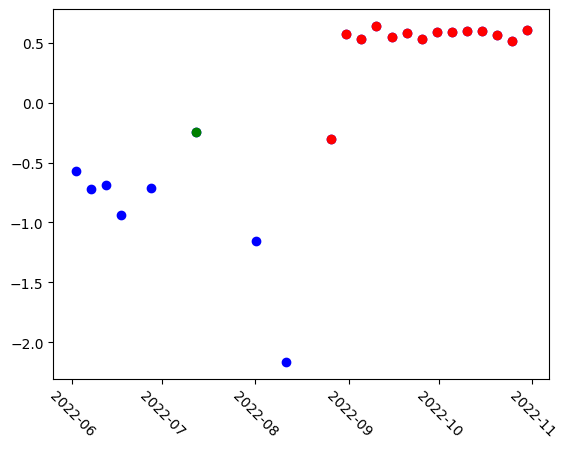

In [34]:
# Run PCA
pca = decomposition.PCA(n_components=1)
pca_result = pca.fit_transform(embeddings)

plt.xticks(rotation=-45)

# Plot all points in blue first
plt.scatter(stack.time, pca_result, color="blue")

# Re-plot cloudy images in green
plt.scatter(stack.time[5], pca_result[5], color="green")

# Color all images after flood in red
plt.scatter(stack.time[8:], pca_result[8:], color="red")

### Fine-Tune the Model
Finally, a classifier is again trained on the embeddings to identify flood events.

In [35]:
# Label the images we downloaded
# 0 = Cloud
# 1 = Pre-flood
# 2 = Post-flood
labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Split into fit and test manually, ensuring we have at least all 3 classes in both sets
fit = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
test = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Train a Support Vector Machine model
clf = svm.SVC()
clf.fit(embeddings[fit] + 100, labels[fit])

# Predict classes on test set
prediction = clf.predict(embeddings[test] + 100)

# Perfect match for SVM
match = np.sum(labels[test] == prediction)
print(f"Matched {match} out of {len(test)} correctly")

Matched 7 out of 11 correctly


### Change Detection Heatmap (Pre- vs. Post-Flood Distances)

We can generate a heatmap to visualize pairwise distances between embeddings from pre-flood and post-flood periods. Each cell's value represents the distance between a specific pre-flood and post-flood embedding.

We will also compute the average distance. A high average distance suggests that the model identifies significant differences between pre- and post-flood conditions. This could reflect meaningful changes in the landscape.

As for the heatmap, pattern consistency is key to look for. Uniformity in the heatmap (similar distances across all pairs) indicates a consistent model response to changes. Non-uniformity might suggest localized variations. Smaller distances between certain pairs might highlight areas unaffected by the event or areas with similarities across both periods.

Notice that the row impacted by the greatest distance includes the cloudy image at index 8. This makes sense as the cloudy image will bear greater dissimilarity to the other embeddings, both pre- and post-flood.

Average embedding distance between pre- and post-event: 2.0040


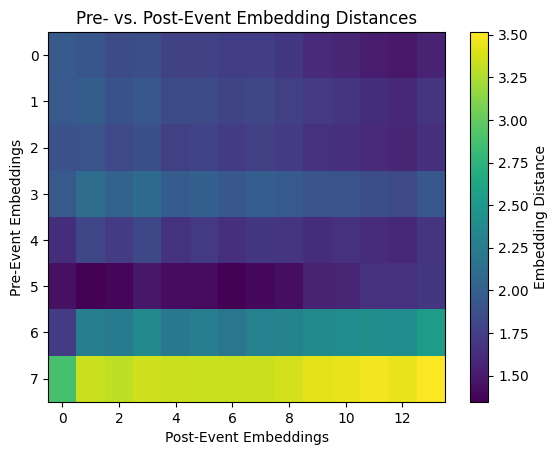

In [36]:
# Embeddings from pre- and post-flood
pre_event_embeddings = embeddings[:8]
post_event_embeddings = embeddings[8:]

# Calculate pairwise distances between pre- and post-event embeddings
distance_matrix = pairwise_distances(pre_event_embeddings, post_event_embeddings)

# Get the average of the distance matrix
avg_distance = np.mean(distance_matrix)
print(f"Average embedding distance between pre- and post-event: {avg_distance:.4f}")

# Visualize the differences
plt.imshow(distance_matrix, cmap="viridis", aspect="auto")
plt.colorbar(label="Embedding Distance")
plt.title("Pre- vs. Post-Event Embedding Distances")
plt.xlabel("Post-Event Embeddings")
plt.ylabel("Pre-Event Embeddings")
plt.show()

It might be helpful to look once more at the images chronologically ordered after visualizing the graph above.

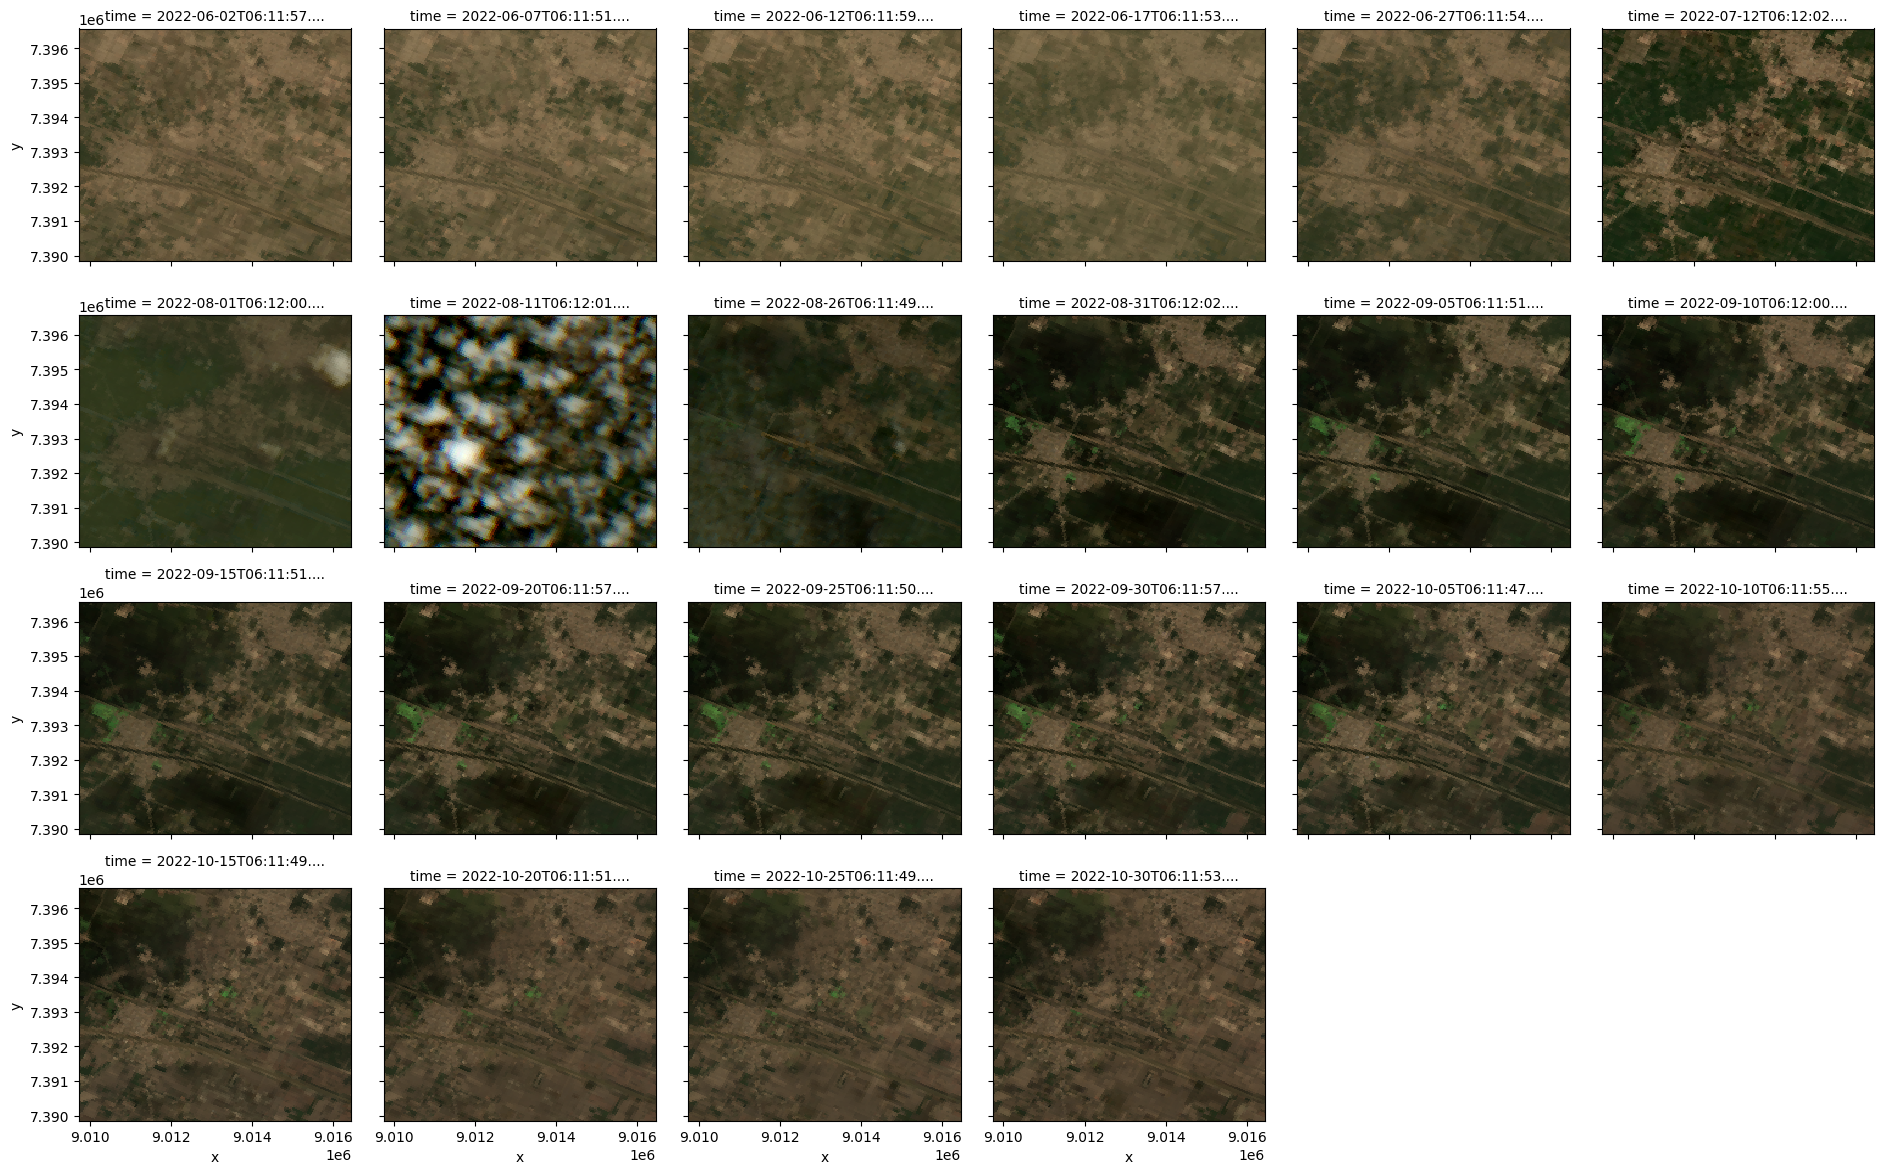

In [37]:
stack.sel(band=["red", "green", "blue"]).plot.imshow(
    row="time", rgb="band", vmin=0, vmax=25000, col_wrap=6
)

### Discussion

---

#### How do I know when EOFMs are the right tool?

EOFMs are particularly suitable when:

* You have **limited labeled data**
* Your task requires **generalizable spatial or temporal reasoning**
* You want to **transfer models across regions or sensors**
* You seek to build **multi-task pipelines** (e.g., classification + segmentation + anomaly detection)

They are less appropriate when:

* You have abundant labels and simple classification tasks
* Computational cost is a constraint
* Model interpretability is the top priority

---

#### How does the use of EOFMs compare to the performance of other approaches?

##### Zero-shot

This means of use is addressed in the chapter. Zero-shot performance (without task-specific training) gives a baseline for how well the pretrained EOFM has generalized from pretraining to your task domain. This is a strength of Prithvi and CLAY in particular, as they can encode rich geospatial patterns directly from input data.

##### Fine-tuning

Fine-tuning should be benchmarked alongside zero-shot usage in practice when using a specialized dataset, or when training for downstream tasks. Fine-tuning can enable domain-specific adaptation and often improves accuracy, particularly in edge cases or for features not well represented in pretraining. This comes with increased computational cost and overfitting risk if data is limited.

##### Simpler methods

It's essential to benchmark EOFMs against simpler baselines like:

* Classical remote sensing indices + Random Forest
* SVM
* Spectral-only MLPs
* Convolutional Neural Networks

These comparisons help quantify whether the added complexity of a foundation model is justified for your task.

##### Other feature reduction techniques

Other unsupervised methods like pure PCA, autoencoders, or temporal summaries may be compared to EOFM embeddings when used as input to downstream classifiers. This allows us to understand whether EOFMs truly encode more discriminative or transferable features than conventional feature engineering pipelines.

---

#### How does the performance of different models compare relative to each approach’s resource consumption?

| Model Type              | Performance               | Compute Cost | Training Data Needed | Suitability                       |
| ----------------------- | ------------------------- | ------------ | -------------------- | --------------------------------- |
| EOFM (Prithvi/CLAY)     | High (esp. zero/few shot) | High         | Low–Moderate         | Complex, generalizable tasks      |
| Random Forest + Indices | Medium                    | Low          | Moderate             | Simple tasks                      |
| CNN from scratch        | Medium–High               | Medium–High  | High                 | Supervised tasks with many labels |
| PCA + SVM               | Low–Medium                | Very Low     | Moderate             | Baselines, small-scale tasks      |

---

#### What kinds of interpretability can be done?

* **Attention maps** (e.g., from ViT-based EOFMs like Prithvi and Clay)
* **Similarity search** using embedding distances (semantic matching)
* **Visualization of embedding spaces** (UMAP/t-SNE for EO tasks)

For Prithvi and CLAY, embedding-based analysis (e.g., clustering, retrieval, similarity) is particularly powerful, though attribution methods are still emerging.

---

#### How can I use the information above to ensure I choose the right method?

Choosing between methods depends on:

* **Label availability** (EOFMs are strong when labels are scarce)
* **Task complexity** (fine-grained or abstract tasks benefit more from EOFMs)
* **Computation available** (EOFMs are heavier; classical methods are leaner)
* **Performance delta** (if EOFMs outperform simple methods only marginally, simpler methods may be preferable)

---

#### How can we stratify train, test, and validation to ensure proper evaluation?

* **Spatial stratification**: sample by region or tile, carefully to avoid spatial leakage
* **Temporal stratification**: ensure held-out time stamps in test set
* **Environmental conditions**: vary climate, terrain, and seasonality
* **Stratified sampling**: ensure class balance in all sets (important for rare class detection)

Avoid random pixel-based splits—these can overestimate performance due to spatial autocorrelation.

---

#### How can we evaluate at both the tile and map level to ensure proper continuity and qualitative “reasonability” of the output?

* **Tile-level metrics**: per-tile accuracy, F1, confusion matrices
* **Map-level coherence**: visually inspect maps for spatial discontinuities, fragmentation, or unreasonable transitions
* **Temporal consistency**: ensure predictions are temporally smooth where expected (e.g., gradual seasonal change)

Use moving window accuracy checks and expert review of map artifacts. EOFMs can occasionally "hallucinate" features if the embedding has been poorly grounded.

---

#### What to do when one's label set is limited?

* **Use EOFM embeddings as features**: they encode high-level patterns without requiring supervised training
* **Leverage weak supervision**: use coarsely labeled data
* **Few-shot fine-tuning**: tune only the last layer with a handful of labels
* **Self-training or pseudo-labeling**: train on confident predictions
* **Domain adaptation**: try transferring from well-labeled regions to unlabeled ones.

### Conclusion

In this notebook, we have demonstrated how to evaluate two EOFMs on a real historical event. Through these examples, the goal was to illustrate how EOFMs can be used to generate embeddings from relevant satellite imagery, observe salient patterns within the data, and subsequently expedite classification of an event by way of fine-tuning. This has been a practical series of tasks one might use to evaluate the efficacy of an EOFM for their unique problem.